In [16]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt 

X_train = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y_train = [0, 0, 0, 0, 1, 1, 1, 1]

model = LogisticRegression()  # default regularization: l2
model.fit(X_train, y_train)

model.predict([[5]])

array([1])

In [17]:
# class probabilities for each point
X = np.linspace(1, 9, 100).reshape(-1, 1)
y_prob = model.predict_proba(X)

y_prob

array([[0.98360598, 0.01639402],
       [0.98200989, 0.01799011],
       [0.98026153, 0.01973847],
       [0.97834701, 0.02165299],
       [0.97625128, 0.02374872],
       [0.97395812, 0.02604188],
       [0.97145001, 0.02854999],
       [0.96870809, 0.03129191],
       [0.96571215, 0.03428785],
       [0.96244048, 0.03755952],
       [0.95886994, 0.04113006],
       [0.95497584, 0.04502416],
       [0.95073201, 0.04926799],
       [0.94611074, 0.05388926],
       [0.94108286, 0.05891714],
       [0.9356178 , 0.0643822 ],
       [0.92968369, 0.07031631],
       [0.9232475 , 0.0767525 ],
       [0.91627525, 0.08372475],
       [0.90873225, 0.09126775],
       [0.9005834 , 0.0994166 ],
       [0.89179363, 0.10820637],
       [0.88232825, 0.11767175],
       [0.8721536 , 0.1278464 ],
       [0.86123753, 0.13876247],
       [0.84955019, 0.15044981],
       [0.83706471, 0.16293529],
       [0.82375804, 0.17624196],
       [0.80961181, 0.19038819],
       [0.79461322, 0.20538678],
       [0.

(0.0, 10.0)

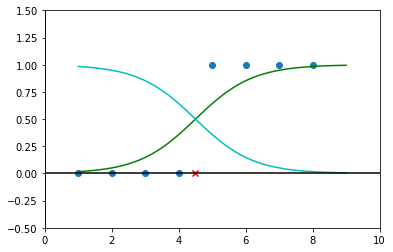

In [18]:
plt.scatter( X_train, y_train)

plt.plot(X, y_prob[:, 1], color='g')
plt.plot(X, y_prob[:, 0], color='c')

# plotting the decision boundary (a point)
# ax + b = 0 -> x = -b/a
plt.scatter(- model.intercept_/model.coef_, 0, marker='x', color='r')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.ylim(-0.5, 1.5)
plt.xlim(0, 10)

#### Withhout regularization

(0.0, 10.0)

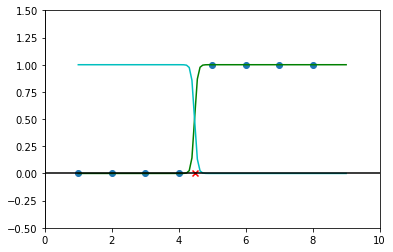

In [19]:
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_prob = model.predict_proba(X)

plt.scatter( X_train, y_train)

plt.plot(X, y_prob[:, 1], color='g')
plt.plot(X, y_prob[:, 0], color='c')

# plotting the decision boundary (a point)
# ax + b = 0 -> x = -b/a
plt.scatter(- model.intercept_/model.coef_, 0, marker='x', color='r')

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.ylim(-0.5, 1.5)
plt.xlim(0, 10)

#### With Two features (predictors)

In [116]:
X_train = np.array(np.array([[1, 2], [2, 2], [2, 1], [3, 4], [4, 4], [4, 3]]))
y_train = [0, 0, 0, 1, 1, 1]

model = LogisticRegression() 
model.fit(X_train, y_train)

model.predict([[1, 1]])

array([0])

In [117]:
X = list(zip(np.linspace(0, 5, 100), np.linspace(0, 5, 100)))
y_prob = model.predict_proba(X)

In [120]:
import pandas as pd
df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
df.columns = ['feat1', 'feat2', 'y']

df

,feat1,feat2,y
0,1,2,0
1,2,2,0
2,2,1,0
3,3,4,1
4,4,4,1
5,4,3,1


In [121]:
model.coef_

array([[0.86834805, 0.86834805]])

In [122]:
model.intercept_

array([-4.63291466])

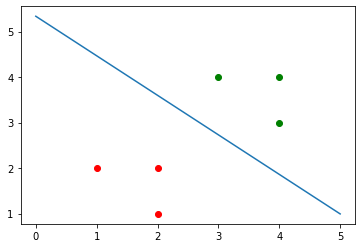

In [109]:
plt.scatter( df.loc[df.y == 0].feat1, df.loc[df.y == 0].feat2, color='r')
plt.scatter( df.loc[df.y == 1].feat1, df.loc[df.y == 1].feat2, color='g')


# decision boundary line 
# a * x_1 + b * x_2 + c = 0
# x_2 = - (a * x_1 + c / b)
def f_x(x1):
  return - (model.coef_[0][0] * x1 + model.intercept_ / model.coef_[0][1])


plt.plot([0, 5], [f_x(0), f_x(5)])

## Softmax

In [110]:
X_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]).reshape(-1, 1)
y_train = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]

model = LogisticRegression(
  multi_class='multinomial'
)
model.fit(X_train, y_train)

model.predict([[9.5]])

array([2])

In [111]:
X = np.linspace(0, 13, 100).reshape(-1, 1)
y_prob = model.predict_proba(X)

In [113]:
# there are three separate lines
model.coef_

array([[-1.15375574e+00],
       [ 5.76411974e-06],
       [ 1.15374998e+00]])

In [114]:
model.intercept_

array([ 6.74004088,  1.51866749, -8.25870837])

(0.0, 13.0)

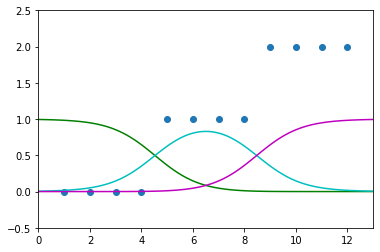

In [33]:
plt.scatter(X_train, y_train)

plt.plot(X, y_prob[:, 0], color='g')
plt.plot(X, y_prob[:, 1], color='c')
plt.plot(X, y_prob[:, 2], color='m')


plt.ylim(-0.5, 2.5)
plt.xlim(0, 13)